In [1]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the data
file_path = "Clickstream_data.csv"
expanded_file_path = os.path.expanduser(file_path)
Online_csd = pd.read_csv(expanded_file_path)
Online_csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
# Getting the summary statistics
summary_stats = Online_csd.describe()
print(f"{'Feature':<20} {'Min Value':<15} {'Max Value':<15} {'σ (Std Dev)':<15}")
for feature in summary_stats.columns:
    print(f"{feature:<20} {summary_stats.at['min', feature]:<15} {summary_stats.at['max', feature]:<15} {summary_stats.at['std', feature]:<15}")


Feature              Min Value       Max Value       σ (Std Dev)    
Administrative       0.0             27.0            3.32178410615674
Administrative_Duration 0.0             3398.75         176.77910747048236
Informational        0.0             24.0            1.2701564259834865
Informational_Duration 0.0             2549.375        140.74929442219084
ProductRelated       0.0             705.0           44.47550330493621
ProductRelated_Duration 0.0             63973.52223     1913.6692878719944
BounceRates          0.0             0.2             0.04848832180626314
ExitRates            0.0             0.2             0.04859654055144408
PageValues           0.0             361.7637419     18.56843660780723
SpecialDay           0.0             1.0             0.19891727315262578
Browser              1.0             13.0            1.7172766755533244
Region               1.0             9.0             2.4015912367436996
TrafficType          1.0             20.0            4.02516

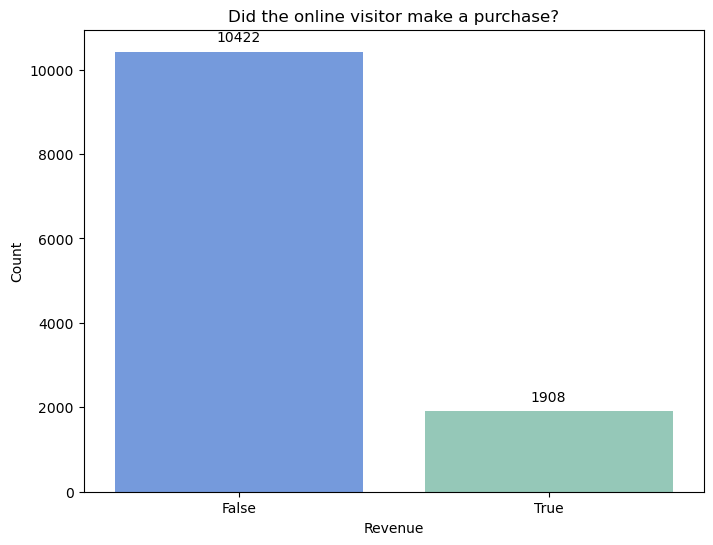

In [18]:
# Target 
# RGB values for custom green and blue
custom_green = (140/255, 209/255, 187/255)  
custom_blue = (100/255, 149/255, 237/255)  
custom_purple = (147/255, 112/255, 219/255) 

custom_palette = [custom_blue, custom_green]

target_column = "Revenue"

if target_column in Online_csd.columns:
    # Plotting the distribution of the target attribute
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=target_column, data=Online_csd, palette=custom_palette)
    plt.title("Did the online visitor make a purchase?")
    plt.ylabel("Count")
    plt.xlabel(target_column)

    # Adding the count above each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')


C:\Users\Yousi\AppData\Local\Temp\ipykernel_2500\3005625806.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Online_csd.corr()


Text(0.5, 1.0, 'Pearson Correlation')

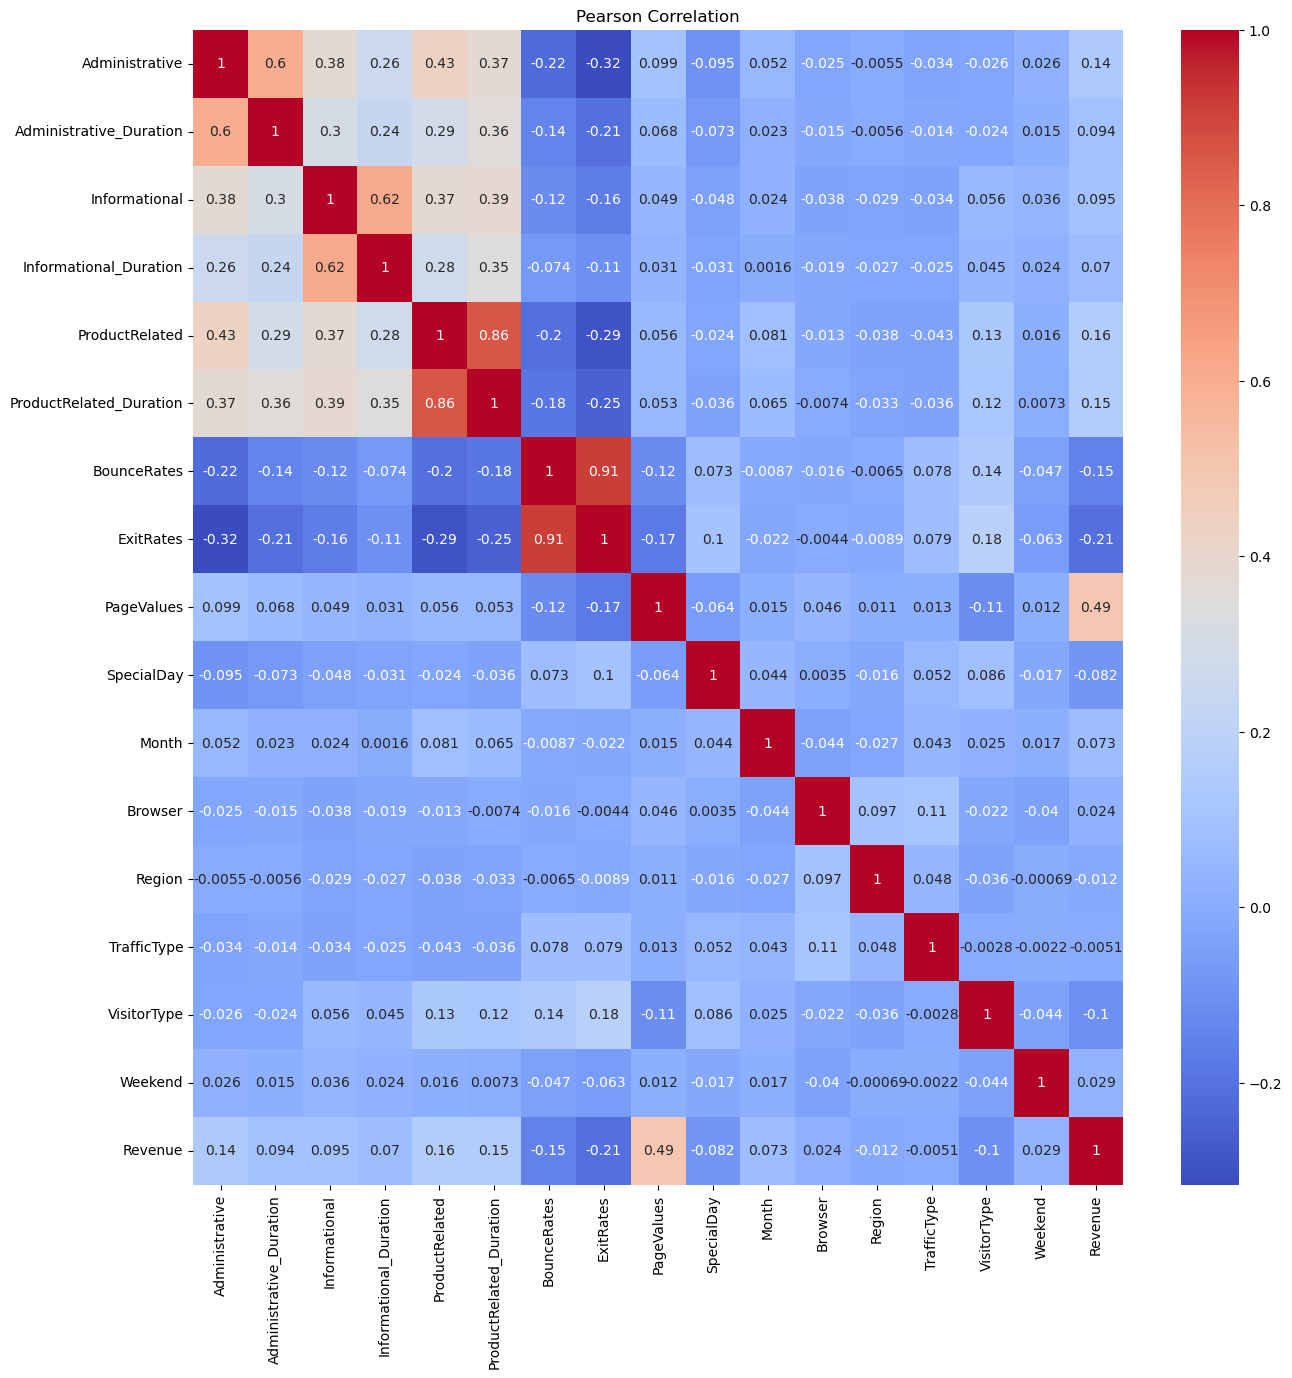

In [19]:
# Pearson Correlations
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# List of categorical columns to encode
categorical_columns = ['Month', 'VisitorType', 'Weekend', 'Revenue']
# Apply label encoding to each categorical column
for col in categorical_columns:
    Online_csd[col] = label_encoder.fit_transform(Online_csd[col])
# Calculate the Pearson correlation matrix
corr_matrix = Online_csd.corr()
# Create a heatmap
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Pearson Correlation")

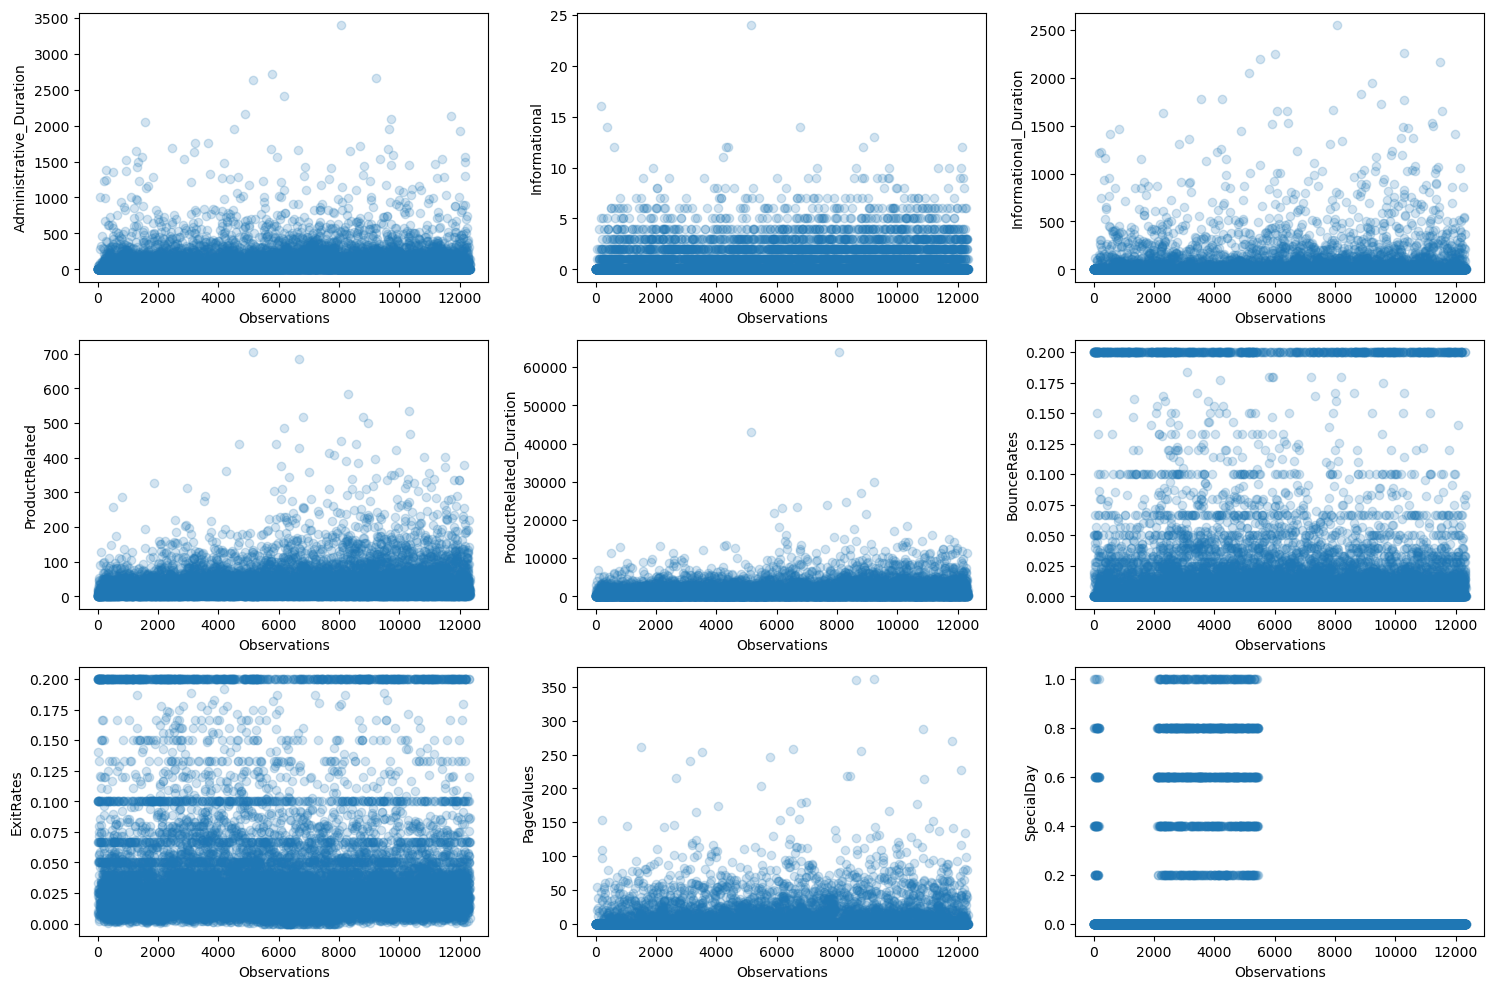

In [21]:
# Observations distributions
# List of specified features
features = [
    'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]

# Number of observations
m = len(Online_csd)

n_rows = 3
n_cols = 3

# Create a figure and a grid of subplots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(range(m), Online_csd[feature], alpha=0.2) 
    plt.xlabel('Observations')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

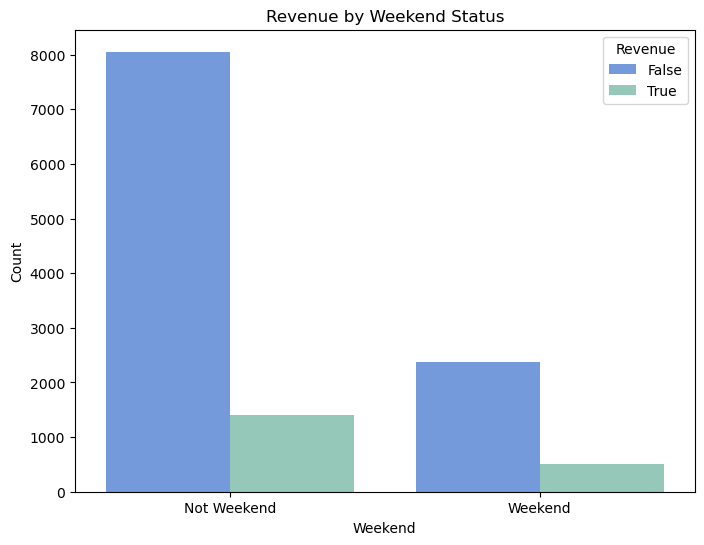

In [23]:
# Revenue by Weekend Status
Online_csd = pd.read_csv(expanded_file_path)
Online_csd['Weekend'] = Online_csd['Weekend'].map({True: 'Weekend', False: 'Not Weekend'})

# Create a grouped bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Weekend', hue='Revenue', data=Online_csd, palette=custom_palette)
plt.title('Revenue by Weekend Status')
plt.ylabel('Count')
plt.show()

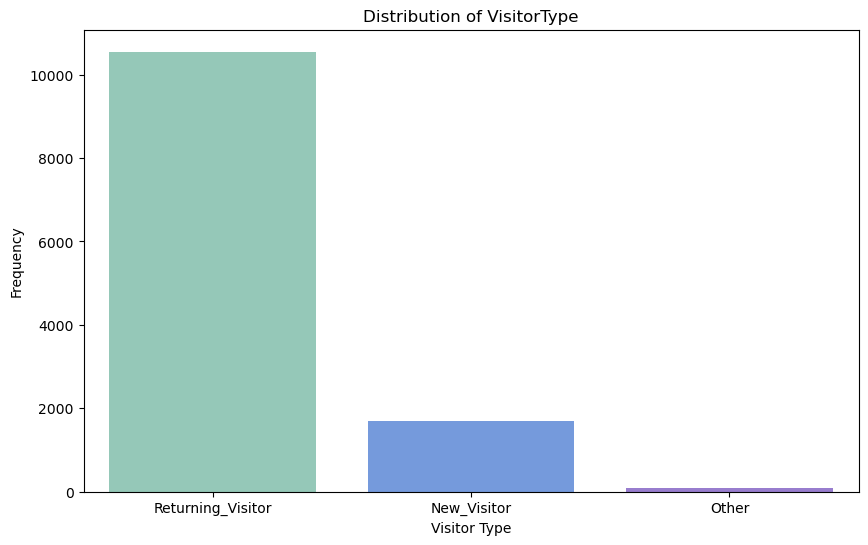

In [24]:
# visitor_type
visitor_type_counts = Online_csd['VisitorType'].value_counts()
colors = [custom_green if vt == "Returning_Visitor" else custom_blue if vt == "New_Visitor" else custom_purple for vt in visitor_type_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=visitor_type_counts.index, y=visitor_type_counts.values, palette=colors)
plt.title('Distribution of VisitorType')
plt.xlabel('Visitor Type')
plt.ylabel('Frequency')

plt.show()

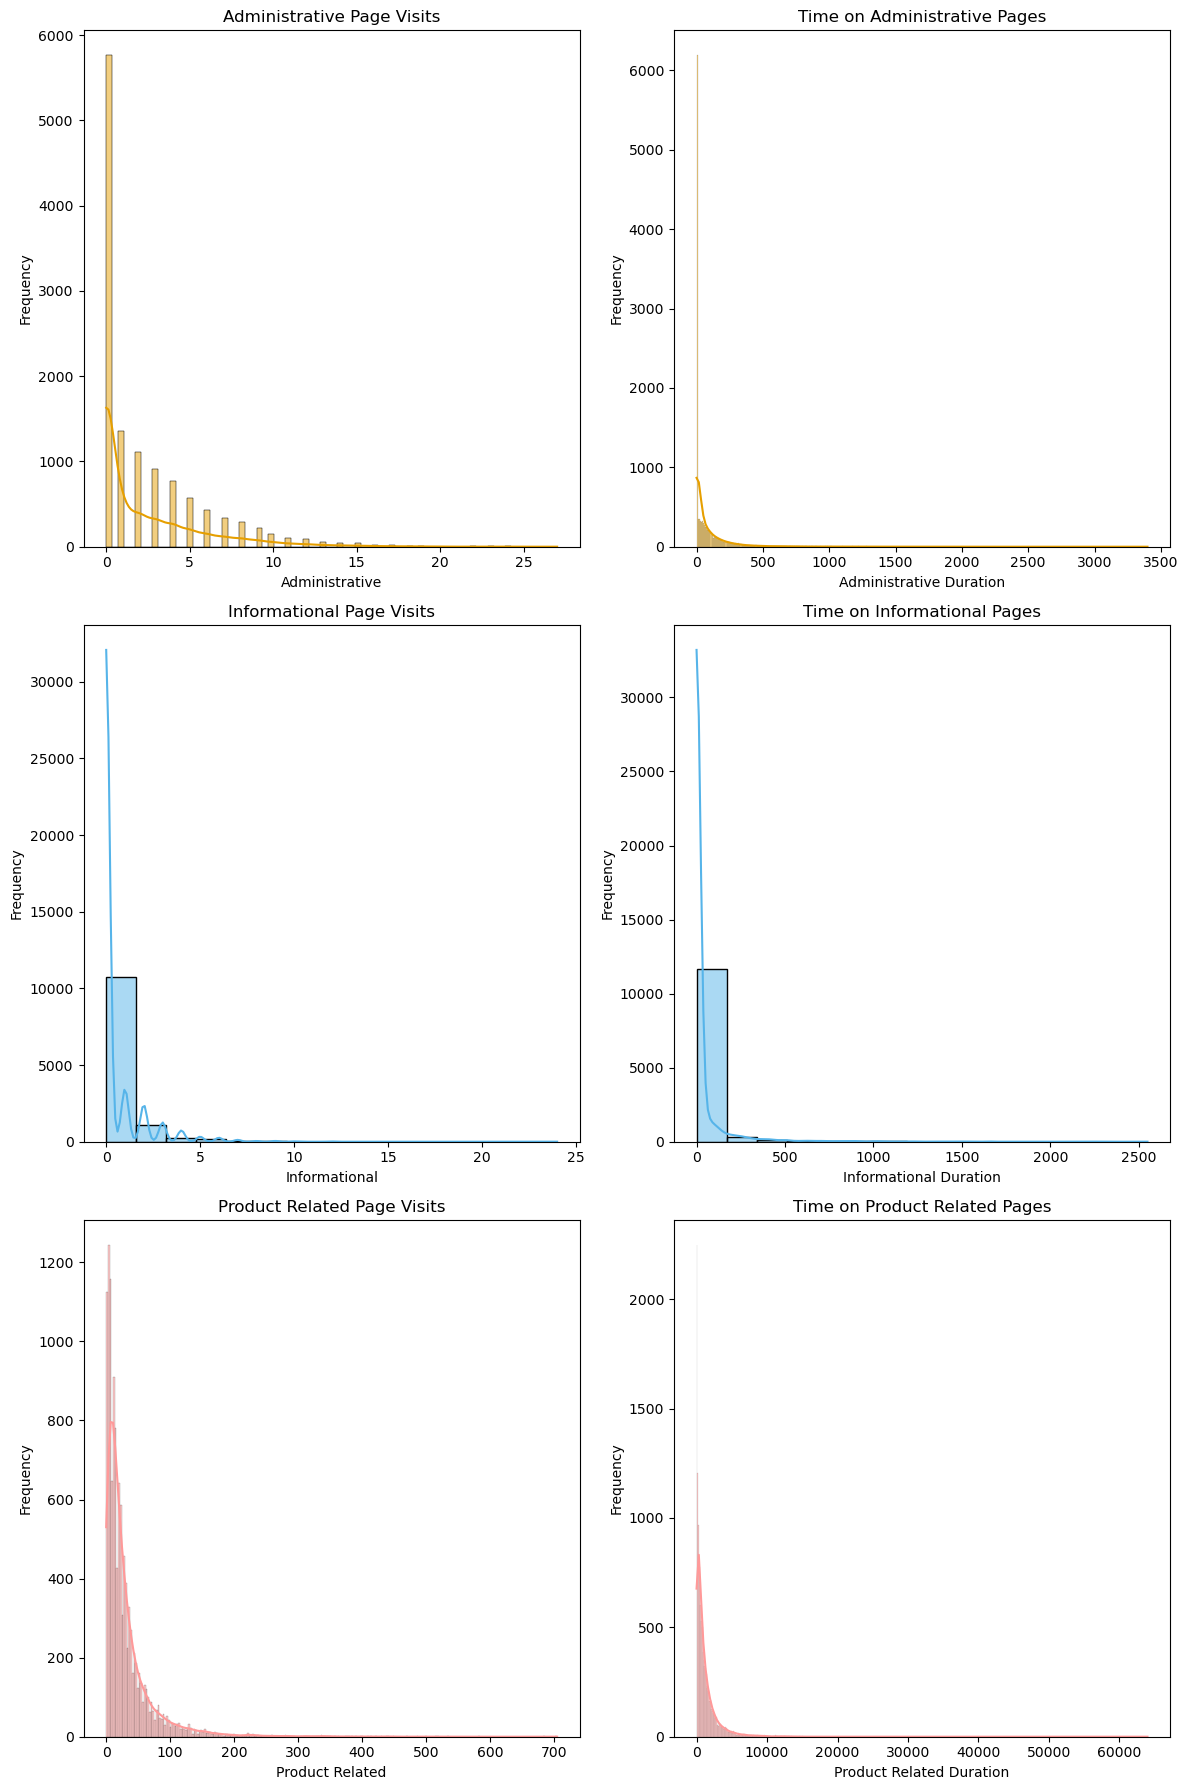

In [32]:
# Distribution for Pages Related Features

fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjust the size as needed

# Administrative
sns.histplot(Online_csd['Administrative'], ax=axes[0, 0], color='#E69F00', kde=True)
axes[0, 0].set_title('Administrative Page Visits')
axes[0, 0].set_xlabel('Administrative')
axes[0, 0].set_ylabel('Frequency')

# Administrative_Duration
sns.histplot(Online_csd['Administrative_Duration'], ax=axes[0, 1], color='#E69F00', kde=True)
axes[0, 1].set_title('Time on Administrative Pages')
axes[0, 1].set_xlabel('Administrative Duration')
axes[0, 1].set_ylabel('Frequency')

# Informational
sns.histplot(Online_csd['Informational'], ax=axes[1, 0], color='#56B4E9', kde=True)
axes[1, 0].set_title('Informational Page Visits')
axes[1, 0].set_xlabel('Informational')
axes[1, 0].set_ylabel('Frequency')

# Informational_Duration
sns.histplot(Online_csd['Informational_Duration'], ax=axes[1, 1], color='#56B4E9', kde=True)
axes[1, 1].set_title('Time on Informational Pages')
axes[1, 1].set_xlabel('Informational Duration')
axes[1, 1].set_ylabel('Frequency')

# ProductRelated
sns.histplot(Online_csd['ProductRelated'], ax=axes[2, 0], color='#FF9999', kde=True)
axes[2, 0].set_title('Product Related Page Visits')
axes[2, 0].set_xlabel('Product Related')
axes[2, 0].set_ylabel('Frequency')

# ProductRelated_Duration
sns.histplot(Online_csd['ProductRelated_Duration'], ax=axes[2, 1], color='#FF9999', kde=True)
axes[2, 1].set_title('Time on Product Related Pages')
axes[2, 1].set_xlabel('Product Related Duration')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


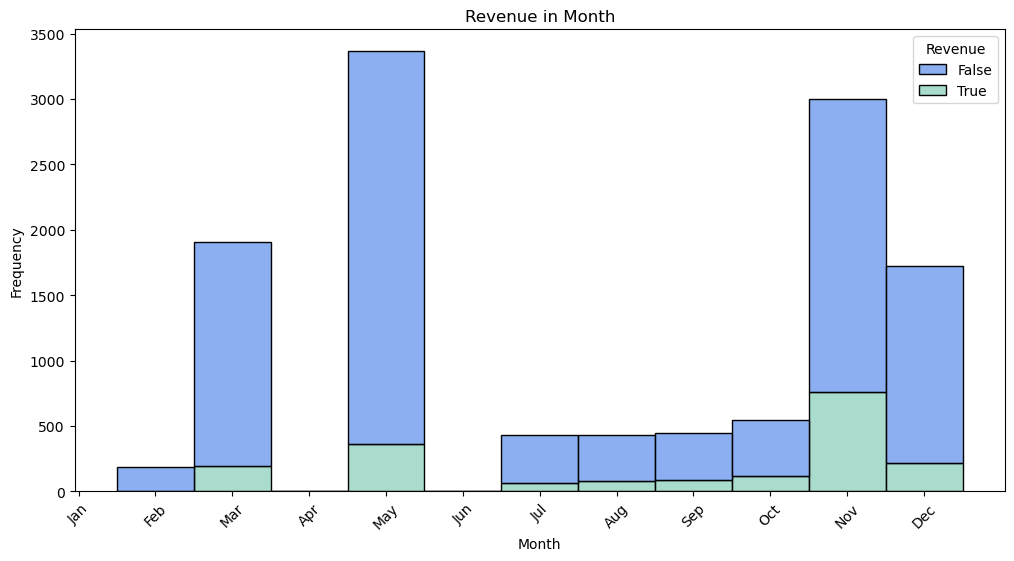

In [29]:
# Revenue in Month
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Online_csd['Month'] = pd.Categorical(Online_csd['Month'], categories=months_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.histplot(data=Online_csd, x='Month', hue='Revenue', multiple='stack', palette=[custom_blue, custom_green])
plt.title('Revenue in Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()


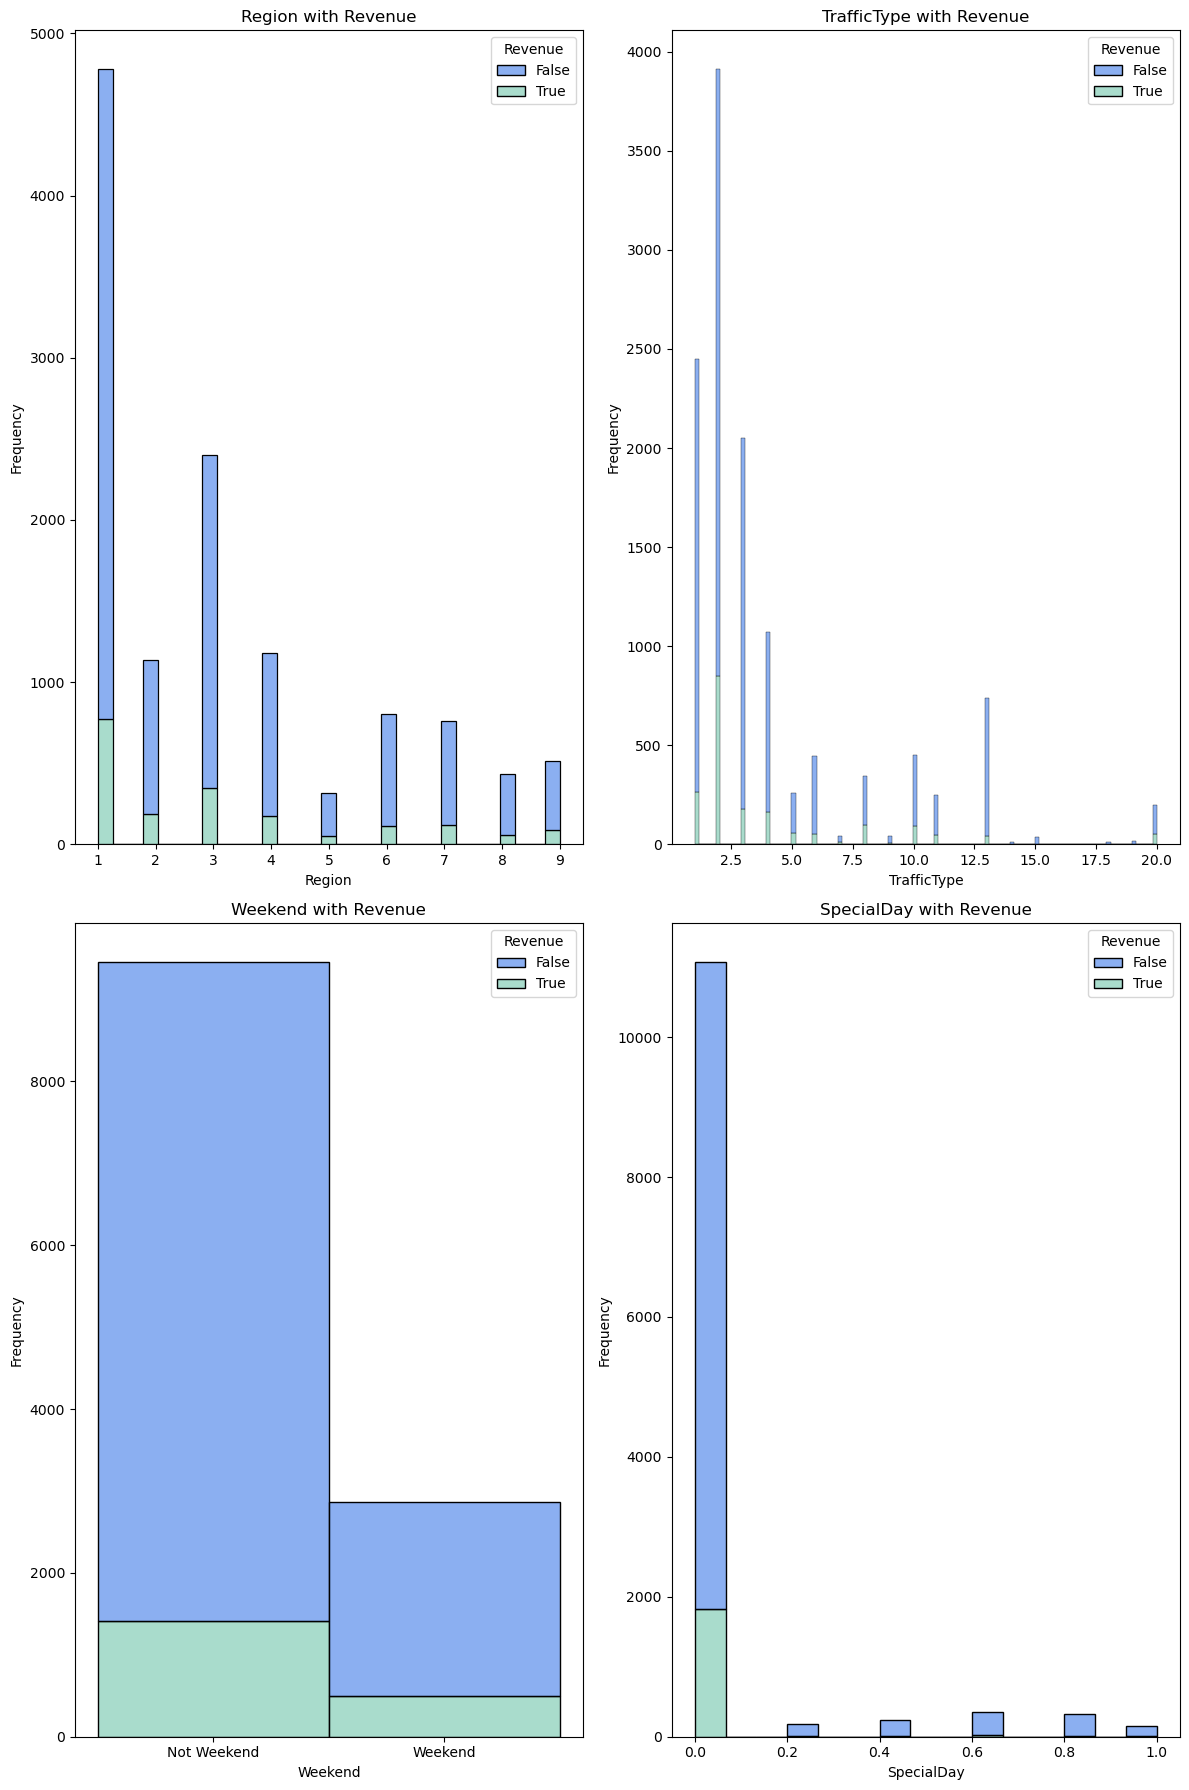

In [31]:
# Other features with Revenue
columns = ['Region', 'TrafficType', 'Weekend', 'SpecialDay']
fig, axes = plt.subplots(2, 2, figsize=(12, 18))  # Adjust the size as needed

for i, column in enumerate(columns):
    row, col = divmod(i, 2)
    sns.histplot(data=Online_csd, x=column, hue='Revenue', multiple='stack', palette=[custom_blue, custom_green], ax=axes[row][col])
    axes[row][col].set_title(f'{column} with Revenue')
    axes[row][col].set_xlabel(column)
    axes[row][col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


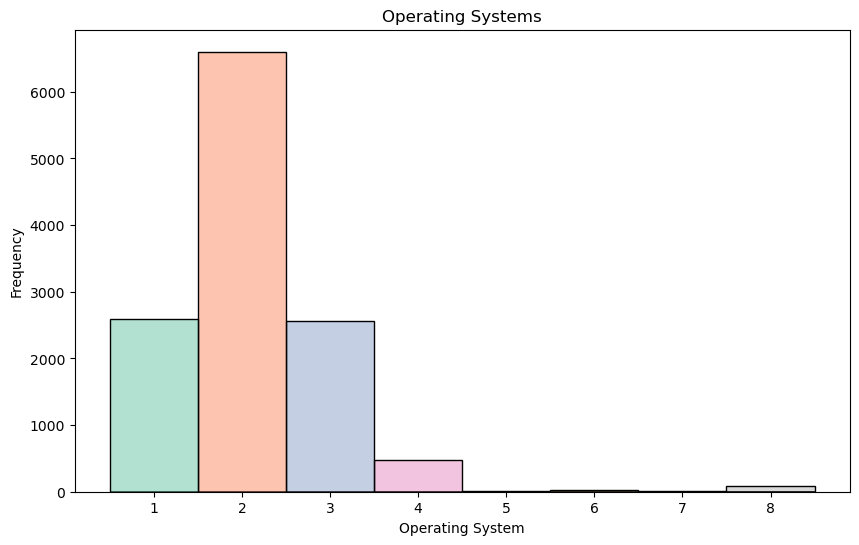

In [35]:
# Operating systems
Online_csd['OperatingSystems'] = pd.Categorical(Online_csd['OperatingSystems'].astype(str), 
                                         categories=sorted(Online_csd['OperatingSystems'].unique().astype(str)), 
                                         ordered=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=Online_csd, x='OperatingSystems', hue='OperatingSystems', palette='Set2', legend=False)
plt.title('Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Frequency')
plt.show()


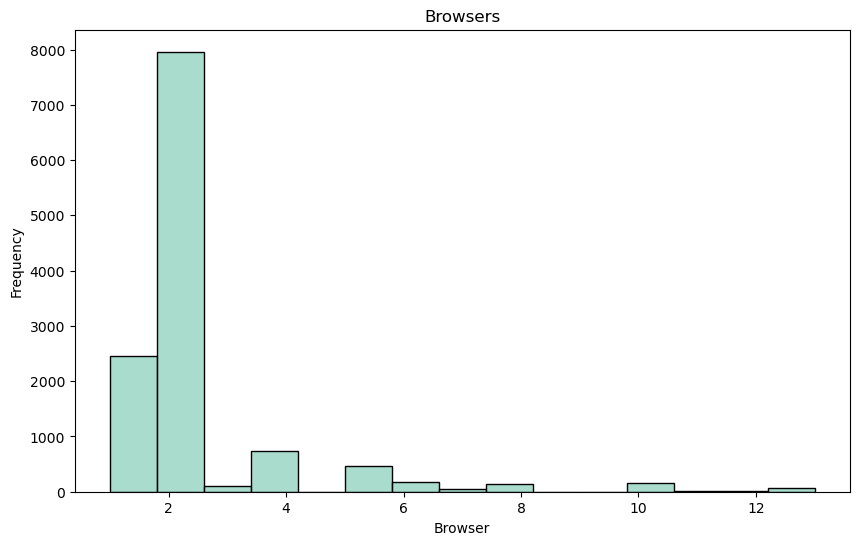

In [36]:
# Browsers
plt.figure(figsize=(10, 6))
sns.histplot(data=Online_csd, x='Browser', color=custom_green)
plt.title('Browsers')
plt.xlabel('Browser')
plt.ylabel('Frequency')

plt.show()

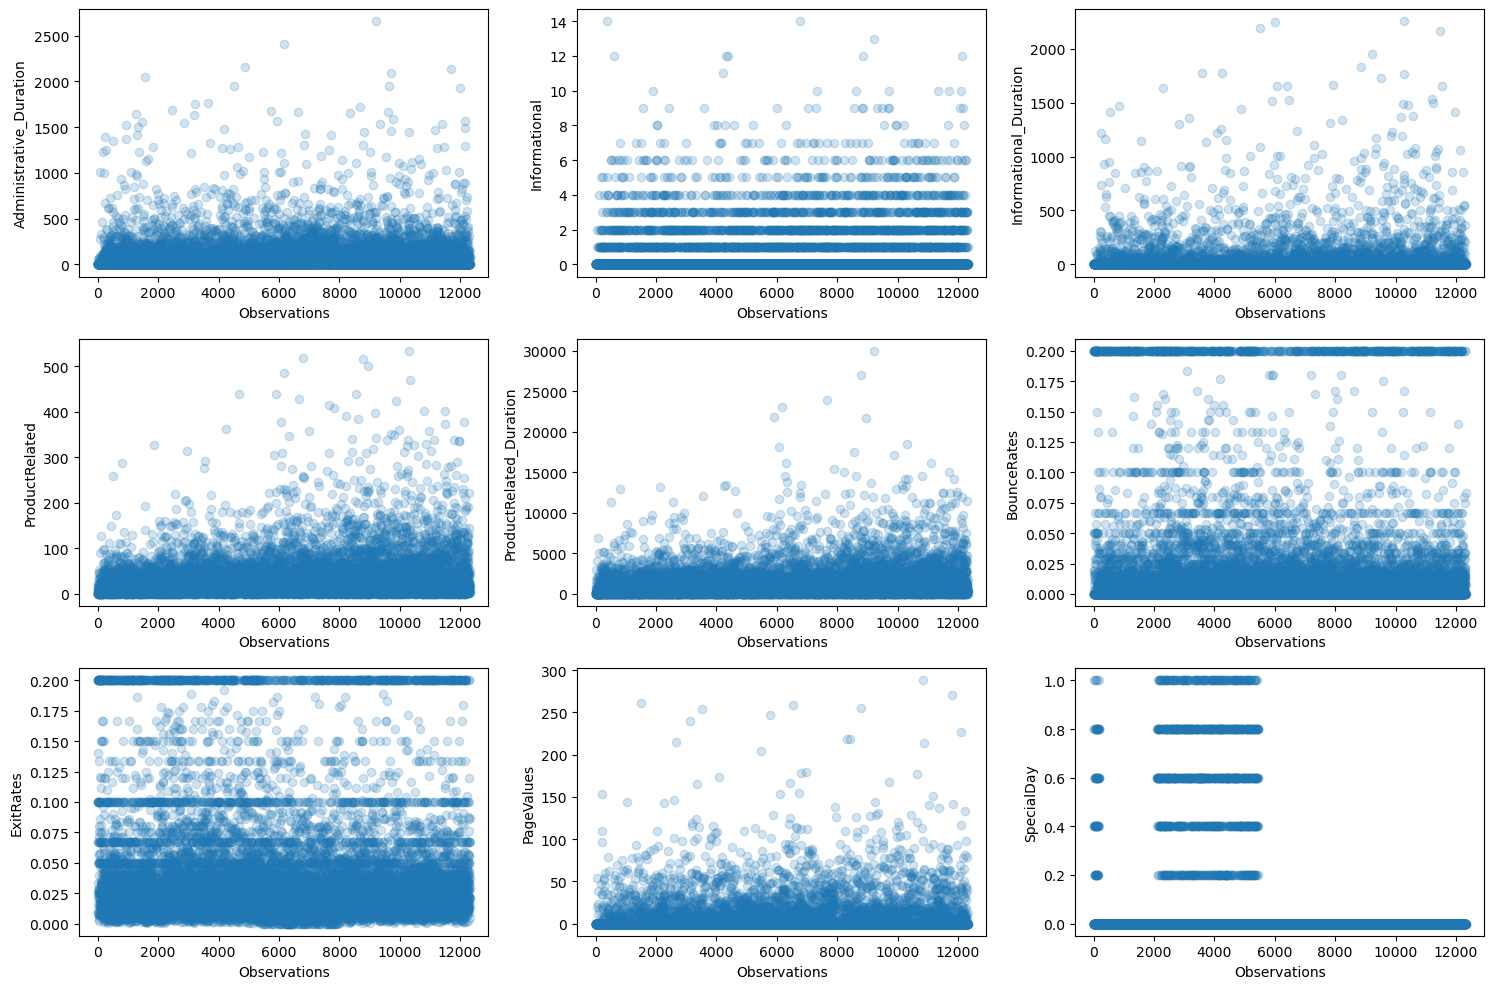

In [37]:
# Features from which extreme values will be removed
features_to_clean = {
    'ProductRelated_Duration': 2,
    'Informational': 1,
    'Administrative_Duration': 1,
    'ProductRelated': 2,
    'PageValues': 2
}

data_modified = Online_csd.copy()
for feature, count in features_to_clean.items():
    for _ in range(count):
        max_value_index = data_modified[feature].idxmax()
        data_modified.drop(max_value_index, inplace=True)

m = len(data_modified)

n_rows = 3
n_cols = 3

features = [
    'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(range(m), data_modified[feature], alpha=0.2)
    plt.xlabel('Observations')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()